In [1]:
from xgcm import Grid
import pop_tools
import gcsfs
import fsspec as fs
import numpy as np
import xesmf as xe
import xarray as xr
import random
import matplotlib.pyplot as plt
import warnings
from xgcm import Grid
import importlib
import preprocessing
import gcm_filters
import xrft

warnings.filterwarnings("ignore")

importlib.reload(preprocessing)
from preprocessing import preprocess_data
from gcm_filtering import filter_inputs_dataset
from gcm_filtering import filter_inputs

In [2]:
ds_merged = preprocess_data()
ds_merged

Load Data
Interpolating ocean velocities
Modify units
Load Data
Align in time
Interpolating ocean velocities
Regrid Atmospheric Data
Modify units
Mask nans
Calculate relative wind


<xarray.Dataset>
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    dxt           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyt           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolon_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    ht            (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    kmt           (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    wet           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    area_t        (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [3]:
ds_in = ds_merged
ds_in = ds_in.drop(['area_t', 'dxt', 'dyt', 'geolat_t', 'geolon_t', 'ht', 'kmt', 'wet'])
ds_in

<xarray.Dataset>
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [4]:
x_min, x_max = 700, 1300
y_min, y_max = 1500, 1800
ds_in = ds_in.isel(time=-1).isel(yt_ocean=slice(y_min, y_max), xt_ocean=slice(x_min, x_max))
ds_in

<xarray.Dataset>
Dimensions:       (yt_ocean: 300, xt_ocean: 600)
Coordinates:
    time          object 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -209.9 -209.8 -209.7 ... -150.2 -150.1
  * yt_ocean      (yt_ocean) float64 24.74 24.83 24.92 ... 48.26 48.33 48.39
Data variables:
    slp           (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    t_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    q_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    wind          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    rh_ref        (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    surface_temp  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_ocean       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_ocean       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_relative    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_relative    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [8]:
print("Filtering model")
ds_out_10 = filter_inputs_dataset(ds_in, ['yt_ocean', 'xt_ocean'], filter_scale=10, filter_type='gaussian')
ds_out_10
ds_out_50 = filter_inputs_dataset(ds_in, ['yt_ocean', 'xt_ocean'], filter_scale=50, filter_type='gaussian')
ds_out_50
ds_out_100 = filter_inputs_dataset(ds_in, ['yt_ocean', 'xt_ocean'], filter_scale=100, filter_type='gaussian')
ds_out_100
ds_out_150 = filter_inputs_dataset(ds_in, ['yt_ocean', 'xt_ocean'], filter_scale=150, filter_type='gaussian')
ds_out_150

Filtering model


<xarray.Dataset>
Dimensions:       (xt_ocean: 600, yt_ocean: 300)
Coordinates:
    time          object 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -209.9 -209.8 -209.7 ... -150.2 -150.1
  * yt_ocean      (yt_ocean) float64 24.74 24.83 24.92 ... 48.26 48.33 48.39
Data variables:
    slp           (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    t_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    q_ref         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    wind          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    rh_ref        (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    surface_temp  (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_ocean       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_ocean       (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    u_relative    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
    v_relative    (yt_ocean, xt_ocean) float32 dask.array<chunksize=(300, 600), meta=np.ndarray>
Attributes:
    filter_scale:  150
    filter_type:   gaussian

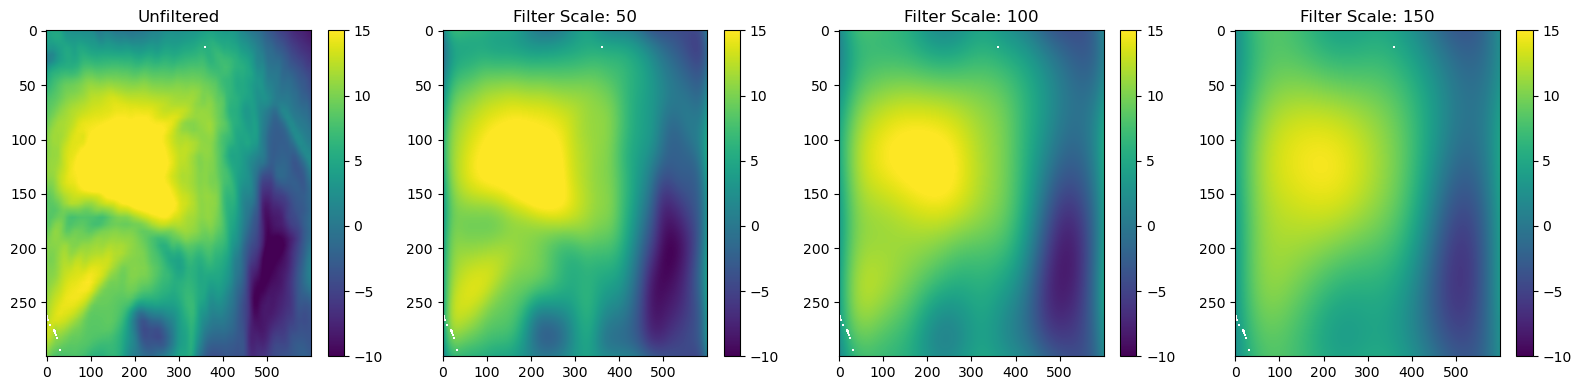

In [15]:
# Create a horizontal layout for four subplots (instead of 3)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))

# Add data to each subplot
im1 = ax1.imshow(ds_in.u_ref, aspect='auto', vmin=-10, vmax=15)
ax1.set_title("Unfiltered")
fig.colorbar(im1, ax=ax1)

im2 = ax2.imshow(ds_out_50.u_ref, aspect='auto', vmin=-10, vmax=15)
ax2.set_title("Filter Scale: 50")
fig.colorbar(im2, ax=ax2)

im3 = ax3.imshow(ds_out_100.u_ref, aspect='auto', vmin=-10, vmax=15)
ax3.set_title("Filter Scale: 100")
fig.colorbar(im3, ax=ax3)

im4 = ax4.imshow(ds_out_150.u_ref, aspect='auto', vmin=-10, vmax=15)
ax4.set_title("Filter Scale: 150")
fig.colorbar(im4, ax=ax4)

plt.tight_layout()
plt.show()


#### What are the units of power spectra?
The units of the x-axis are frequency in terms of wavenumber. The units on the y-axis are power (strength of the signal at that scale)

In [6]:
from distributed import LocalCluster, Client
cluster = LocalCluster(n_workers=4, threads_per_worker=2)
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/panalluri/proxy/8787/status,
Dashboard: /user/panalluri/proxy/8787/status,Workers: 4
Total threads: 8,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42427,Workers: 4
Dashboard: /user/panalluri/proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:34415,Total threads: 2
Dashboard: /user/panalluri/proxy/37199/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:38167,


#### Why do we use window=True in our power spectra calculation?

If the data is not perfectly periodic, the power spectra calculations can be distorted. This is because the power spectra assumes periodicity in the data. Windowing applies a tapering function to the ends of the data. This reduces discontinuities beetween the ends of the data, and makes it more artificially "periodic".

#### Plotting power spectra of variables across filter scales

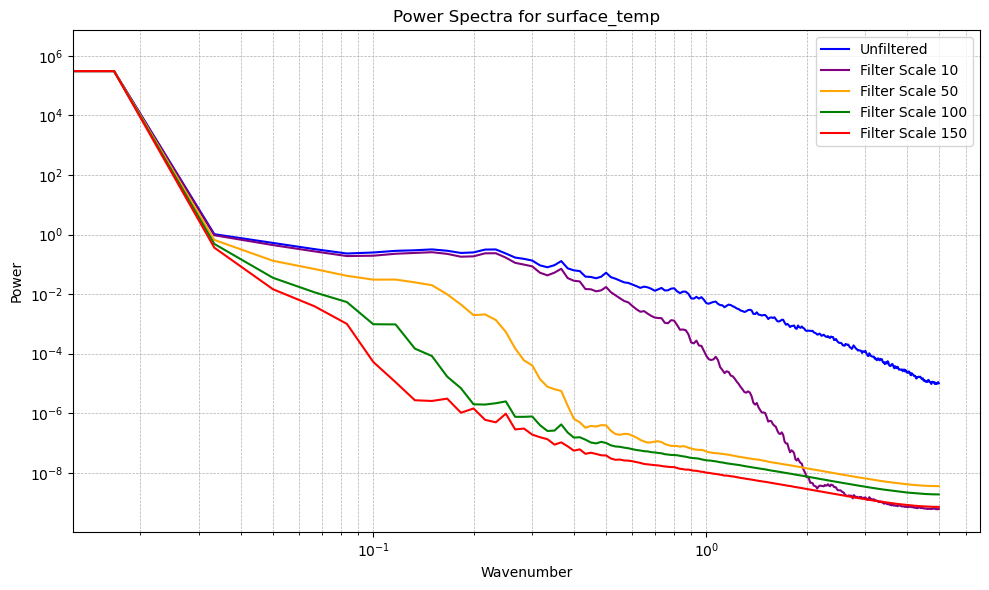

In [10]:
# Define the variable to plot
var = "surface_temp"  # Replace with the name of the variable you want to plot

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Extract high-res data for the variable and compute means
high_res = ds_in[var]
ds_out_10_avg = ds_out_10[var]
ds_out_50_avg = ds_out_50[var]
ds_out_100_avg = ds_out_100[var]
ds_out_150_avg = ds_out_150[var]

# Compute power spectra
ps_orig = xrft.power_spectrum(high_res, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_10 = xrft.power_spectrum(ds_out_10_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_50 = xrft.power_spectrum(ds_out_50_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_100 = xrft.power_spectrum(ds_out_100_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_150 = xrft.power_spectrum(ds_out_150_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')

# Plot power spectra
ax.plot(ps_orig.freq_xt_ocean, ps_orig, label='Unfiltered', color='blue')
ax.plot(ps_10.freq_xt_ocean, ps_10, label='Filter Scale 10', color='purple')
ax.plot(ps_50.freq_xt_ocean, ps_50, label='Filter Scale 50', color='orange')
ax.plot(ps_100.freq_xt_ocean, ps_100, label='Filter Scale 100', color='green')
ax.plot(ps_150.freq_xt_ocean, ps_150, label='Filter Scale 150', color='red')

# Configure plot
ax.set_title(f"Power Spectra for {var}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Power')
ax.legend(loc='best')
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the figure
plt.tight_layout()
plt.show()


The power spectra for the filter scale 10 case matches Dhruv's SST power spectra plot in powerSpectraTutorial.ipynb. The weird dropoffs for larger filter scales is not due to some pre-processing that I am doing before plotting power spectra. The weird dropoffs are likely coming from somewhere else.

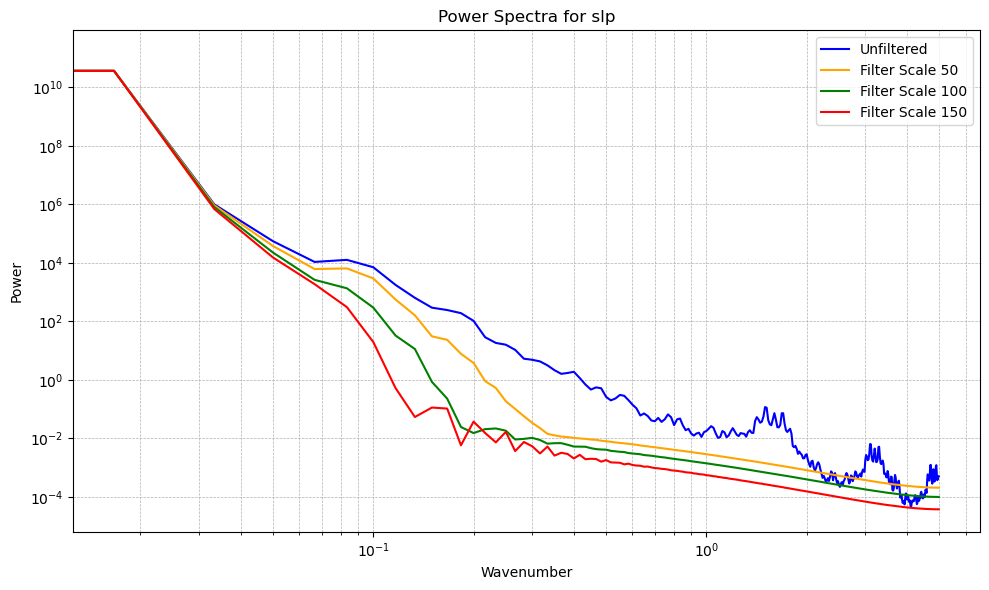

In [23]:
# Define the variable to plot
var = "slp"  # Replace with the name of the variable you want to plot

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Extract high-res data for the variable and compute means
high_res = ds_in[var]
ds_out_50_avg = ds_out_50[var]
ds_out_100_avg = ds_out_100[var]
ds_out_150_avg = ds_out_150[var]

# Compute power spectra
ps_orig = xrft.power_spectrum(high_res, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_50 = xrft.power_spectrum(ds_out_50_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_100 = xrft.power_spectrum(ds_out_100_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_150 = xrft.power_spectrum(ds_out_150_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')

# Plot power spectra
ax.plot(ps_orig.freq_xt_ocean, ps_orig, label='Unfiltered', color='blue')
ax.plot(ps_50.freq_xt_ocean, ps_50, label='Filter Scale 50', color='orange')
ax.plot(ps_100.freq_xt_ocean, ps_100, label='Filter Scale 100', color='green')
ax.plot(ps_150.freq_xt_ocean, ps_150, label='Filter Scale 150', color='red')

# Configure plot
ax.set_title(f"Power Spectra for {var}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Power')
ax.legend(loc='best')
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the figure
plt.tight_layout()
plt.show()


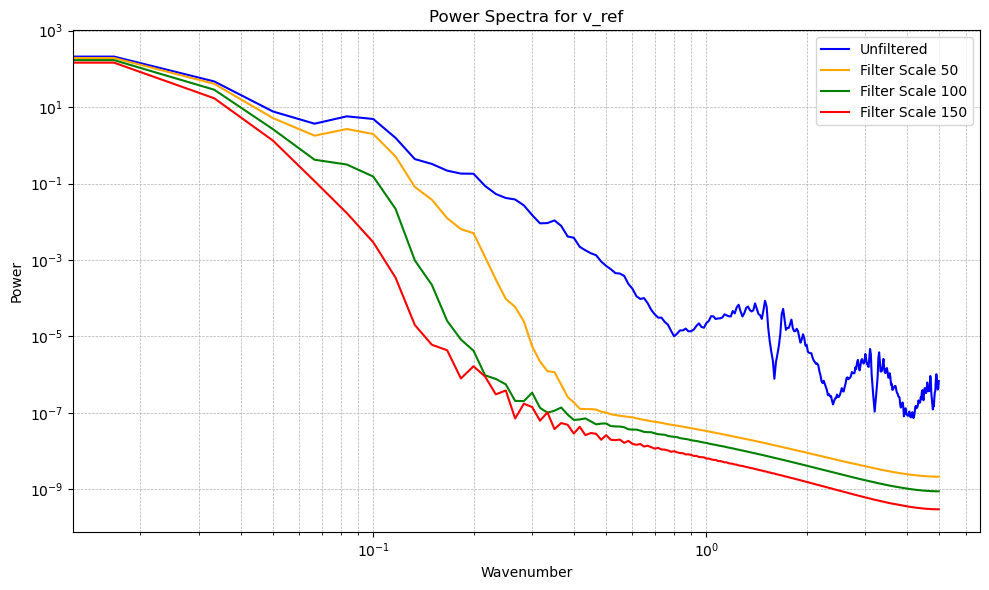

In [26]:
# Define the variable to plot
var = "v_ref"  # Replace with the name of the variable you want to plot

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Extract high-res data for the variable and compute means
high_res = ds_in[var]
ds_out_50_avg = ds_out_50[var]
ds_out_100_avg = ds_out_100[var]
ds_out_150_avg = ds_out_150[var]

# Compute power spectra
ps_orig = xrft.power_spectrum(high_res, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_50 = xrft.power_spectrum(ds_out_50_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_100 = xrft.power_spectrum(ds_out_100_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_150 = xrft.power_spectrum(ds_out_150_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')

# Plot power spectra
ax.plot(ps_orig.freq_xt_ocean, ps_orig, label='Unfiltered', color='blue')
ax.plot(ps_50.freq_xt_ocean, ps_50, label='Filter Scale 50', color='orange')
ax.plot(ps_100.freq_xt_ocean, ps_100, label='Filter Scale 100', color='green')
ax.plot(ps_150.freq_xt_ocean, ps_150, label='Filter Scale 150', color='red')

# Configure plot
ax.set_title(f"Power Spectra for {var}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Power')
ax.legend(loc='best')
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the figure
plt.tight_layout()
plt.show()


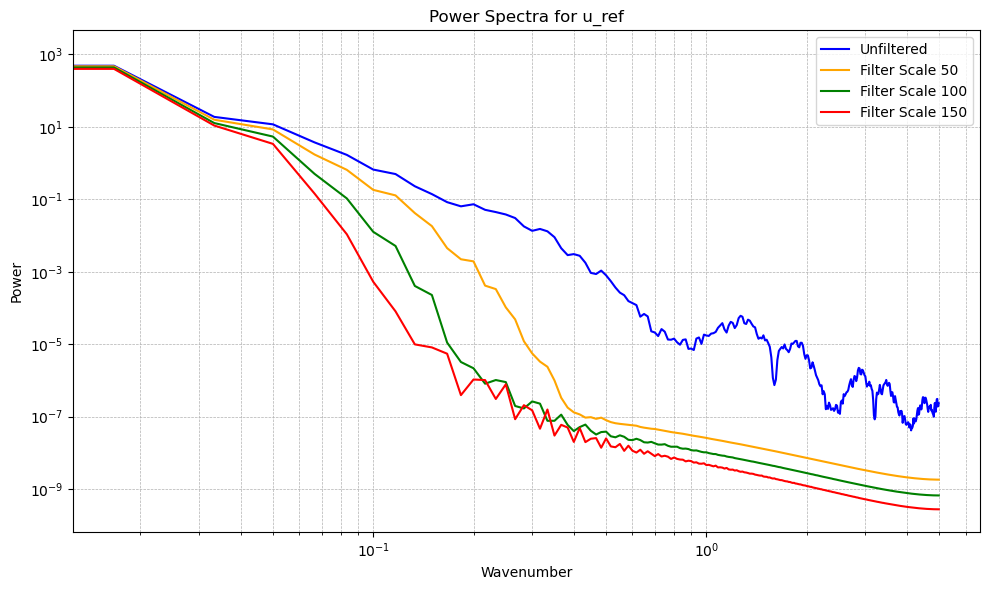

In [29]:
# Define the variable to plot
var = "u_ref"  # Replace with the name of the variable you want to plot

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Extract high-res data for the variable and compute means
high_res = ds_in[var]
ds_out_50_avg = ds_out_50[var]
ds_out_100_avg = ds_out_100[var]
ds_out_150_avg = ds_out_150[var]

# Compute power spectra
ps_orig = xrft.power_spectrum(high_res, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_50 = xrft.power_spectrum(ds_out_50_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_100 = xrft.power_spectrum(ds_out_100_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_150 = xrft.power_spectrum(ds_out_150_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')

# Plot power spectra
ax.plot(ps_orig.freq_xt_ocean, ps_orig, label='Unfiltered', color='blue')
ax.plot(ps_50.freq_xt_ocean, ps_50, label='Filter Scale 50', color='orange')
ax.plot(ps_100.freq_xt_ocean, ps_100, label='Filter Scale 100', color='green')
ax.plot(ps_150.freq_xt_ocean, ps_150, label='Filter Scale 150', color='red')

# Configure plot
ax.set_title(f"Power Spectra for {var}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Power')
ax.legend(loc='best')
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the figure
plt.tight_layout()
plt.show()


In [ ]:
# Define the variable to plot
var = "t_ref"  # Replace with the name of the variable you want to plot

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Extract high-res data for the variable and compute means
high_res = ds_in[var]
ds_out_50_avg = ds_out_50[var]
ds_out_100_avg = ds_out_100[var]
ds_out_150_avg = ds_out_150[var]

# Compute power spectra
ps_orig = xrft.power_spectrum(high_res, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_50 = xrft.power_spectrum(ds_out_50_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_100 = xrft.power_spectrum(ds_out_100_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_150 = xrft.power_spectrum(ds_out_150_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')

# Plot power spectra
ax.plot(ps_orig.freq_xt_ocean, ps_orig, label='Unfiltered', color='blue')
ax.plot(ps_50.freq_xt_ocean, ps_50, label='Filter Scale 50', color='orange')
ax.plot(ps_100.freq_xt_ocean, ps_100, label='Filter Scale 100', color='green')
ax.plot(ps_150.freq_xt_ocean, ps_150, label='Filter Scale 150', color='red')

# Configure plot
ax.set_title(f"Power Spectra for {var}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Power')
ax.legend(loc='best')
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the figure
plt.tight_layout()
plt.show()


In [ ]:
# Define the variable to plot
var = "q_ref"  # Replace with the name of the variable you want to plot

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Extract high-res data for the variable and compute means
high_res = ds_in[var]
ds_out_50_avg = ds_out_50[var]
ds_out_100_avg = ds_out_100[var]
ds_out_150_avg = ds_out_150[var]

# Compute power spectra
ps_orig = xrft.power_spectrum(high_res, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_50 = xrft.power_spectrum(ds_out_50_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_100 = xrft.power_spectrum(ds_out_100_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_150 = xrft.power_spectrum(ds_out_150_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')

# Plot power spectra
ax.plot(ps_orig.freq_xt_ocean, ps_orig, label='Unfiltered', color='blue')
ax.plot(ps_50.freq_xt_ocean, ps_50, label='Filter Scale 50', color='orange')
ax.plot(ps_100.freq_xt_ocean, ps_100, label='Filter Scale 100', color='green')
ax.plot(ps_150.freq_xt_ocean, ps_150, label='Filter Scale 150', color='red')

# Configure plot
ax.set_title(f"Power Spectra for {var}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Power')
ax.legend(loc='best')
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the figure
plt.tight_layout()
plt.show()


In [ ]:
# Define the variable to plot
var = "wind"  # Replace with the name of the variable you want to plot

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Extract high-res data for the variable and compute means
high_res = ds_in[var]
ds_out_50_avg = ds_out_50[var]
ds_out_100_avg = ds_out_100[var]
ds_out_150_avg = ds_out_150[var]

# Compute power spectra
ps_orig = xrft.power_spectrum(high_res, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_50 = xrft.power_spectrum(ds_out_50_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_100 = xrft.power_spectrum(ds_out_100_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_150 = xrft.power_spectrum(ds_out_150_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')

# Plot power spectra
ax.plot(ps_orig.freq_xt_ocean, ps_orig, label='Unfiltered', color='blue')
ax.plot(ps_50.freq_xt_ocean, ps_50, label='Filter Scale 50', color='orange')
ax.plot(ps_100.freq_xt_ocean, ps_100, label='Filter Scale 100', color='green')
ax.plot(ps_150.freq_xt_ocean, ps_150, label='Filter Scale 150', color='red')

# Configure plot
ax.set_title(f"Power Spectra for {var}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Power')
ax.legend(loc='best')
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the figure
plt.tight_layout()
plt.show()


In [ ]:
# Define the variable to plot
var = "rh_ref"  # Replace with the name of the variable you want to plot

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Extract high-res data for the variable and compute means
high_res = ds_in[var]
ds_out_50_avg = ds_out_50[var]
ds_out_100_avg = ds_out_100[var]
ds_out_150_avg = ds_out_150[var]

# Compute power spectra
ps_orig = xrft.power_spectrum(high_res, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_50 = xrft.power_spectrum(ds_out_50_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_100 = xrft.power_spectrum(ds_out_100_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_150 = xrft.power_spectrum(ds_out_150_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')

# Plot power spectra
ax.plot(ps_orig.freq_xt_ocean, ps_orig, label='Unfiltered', color='blue')
ax.plot(ps_50.freq_xt_ocean, ps_50, label='Filter Scale 50', color='orange')
ax.plot(ps_100.freq_xt_ocean, ps_100, label='Filter Scale 100', color='green')
ax.plot(ps_150.freq_xt_ocean, ps_150, label='Filter Scale 150', color='red')

# Configure plot
ax.set_title(f"Power Spectra for {var}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Power')
ax.legend(loc='best')
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the figure
plt.tight_layout()
plt.show()


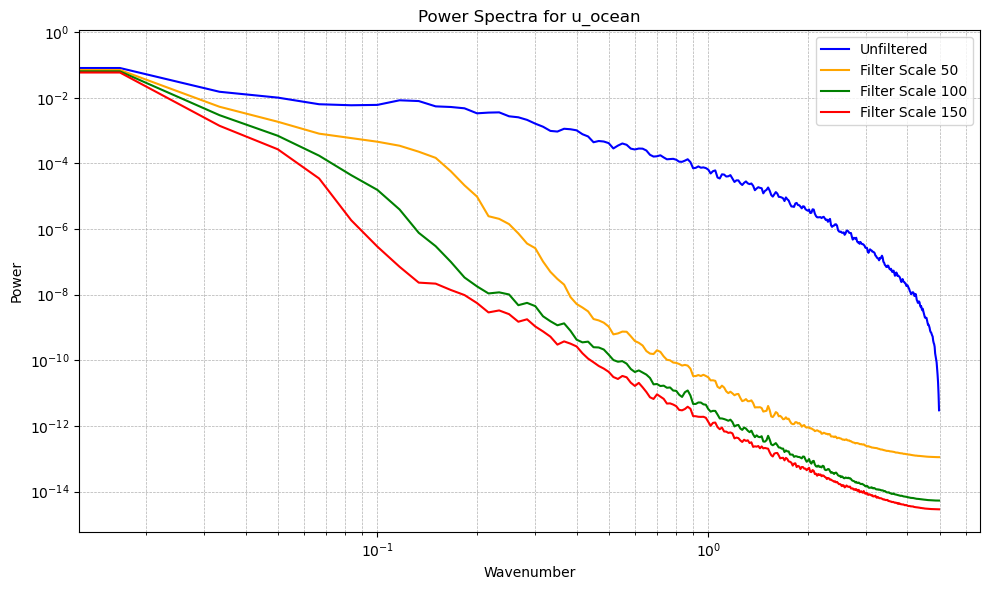

In [32]:
# Define the variable to plot
var = "u_ocean"  # Replace with the name of the variable you want to plot

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Extract high-res data for the variable and compute means
high_res = ds_in[var]
ds_out_50_avg = ds_out_50[var]
ds_out_100_avg = ds_out_100[var]
ds_out_150_avg = ds_out_150[var]

# Compute power spectra
ps_orig = xrft.power_spectrum(high_res, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_50 = xrft.power_spectrum(ds_out_50_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_100 = xrft.power_spectrum(ds_out_100_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_150 = xrft.power_spectrum(ds_out_150_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')

# Plot power spectra
ax.plot(ps_orig.freq_xt_ocean, ps_orig, label='Unfiltered', color='blue')
ax.plot(ps_50.freq_xt_ocean, ps_50, label='Filter Scale 50', color='orange')
ax.plot(ps_100.freq_xt_ocean, ps_100, label='Filter Scale 100', color='green')
ax.plot(ps_150.freq_xt_ocean, ps_150, label='Filter Scale 150', color='red')

# Configure plot
ax.set_title(f"Power Spectra for {var}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Power')
ax.legend(loc='best')
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the figure
plt.tight_layout()
plt.show()


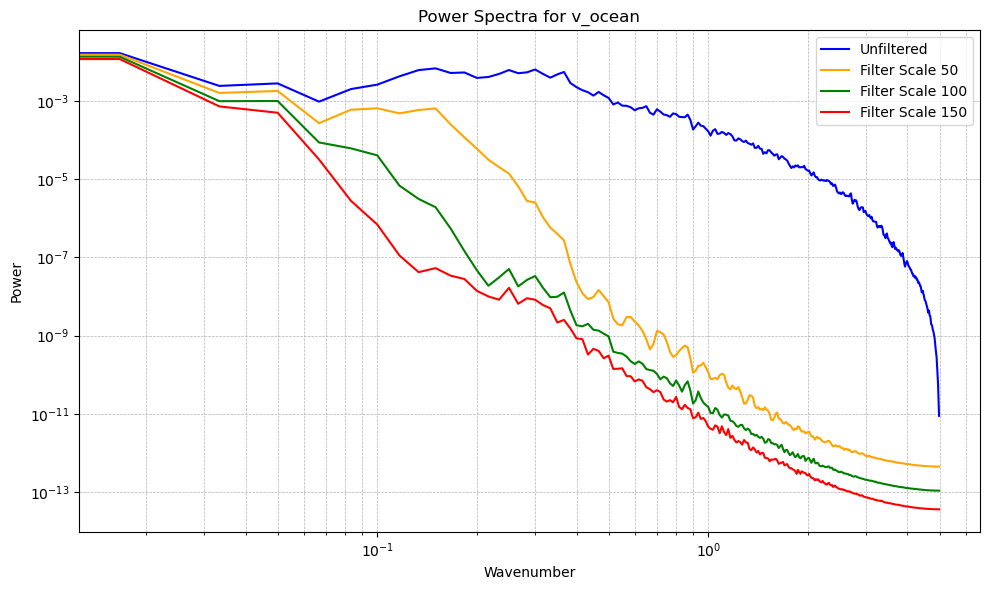

In [33]:
# Define the variable to plot
var = "v_ocean"  # Replace with the name of the variable you want to plot

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Extract high-res data for the variable and compute means
high_res = ds_in[var]
ds_out_50_avg = ds_out_50[var]
ds_out_100_avg = ds_out_100[var]
ds_out_150_avg = ds_out_150[var]

# Compute power spectra
ps_orig = xrft.power_spectrum(high_res, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_50 = xrft.power_spectrum(ds_out_50_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_100 = xrft.power_spectrum(ds_out_100_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_150 = xrft.power_spectrum(ds_out_150_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')

# Plot power spectra
ax.plot(ps_orig.freq_xt_ocean, ps_orig, label='Unfiltered', color='blue')
ax.plot(ps_50.freq_xt_ocean, ps_50, label='Filter Scale 50', color='orange')
ax.plot(ps_100.freq_xt_ocean, ps_100, label='Filter Scale 100', color='green')
ax.plot(ps_150.freq_xt_ocean, ps_150, label='Filter Scale 150', color='red')

# Configure plot
ax.set_title(f"Power Spectra for {var}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Power')
ax.legend(loc='best')
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the figure
plt.tight_layout()
plt.show()


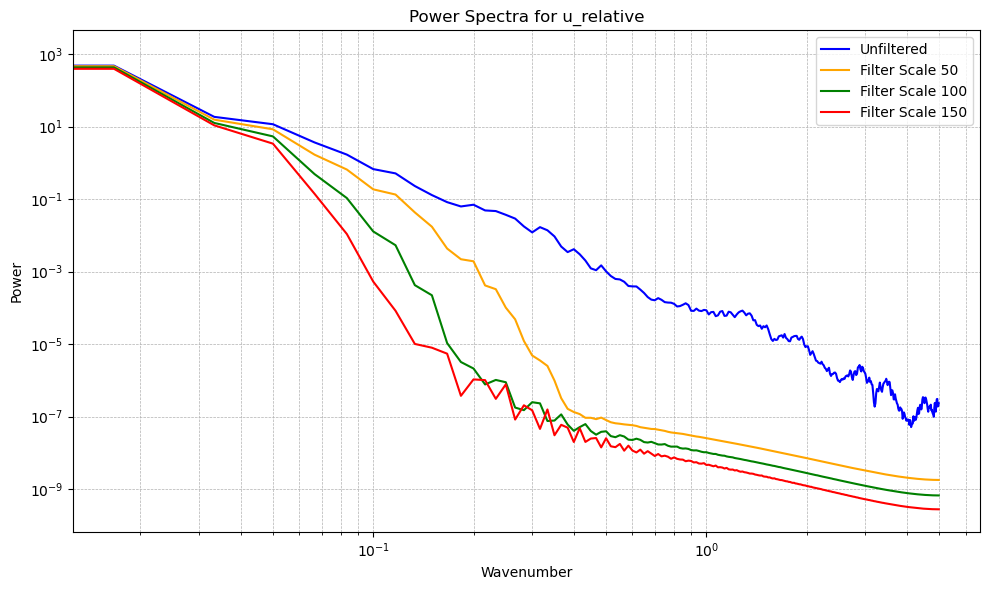

In [34]:
# Define the variable to plot
var = "u_relative"  # Replace with the name of the variable you want to plot

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Extract high-res data for the variable and compute means
high_res = ds_in[var]
ds_out_50_avg = ds_out_50[var]
ds_out_100_avg = ds_out_100[var]
ds_out_150_avg = ds_out_150[var]

# Compute power spectra
ps_orig = xrft.power_spectrum(high_res, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_50 = xrft.power_spectrum(ds_out_50_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_100 = xrft.power_spectrum(ds_out_100_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_150 = xrft.power_spectrum(ds_out_150_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')

# Plot power spectra
ax.plot(ps_orig.freq_xt_ocean, ps_orig, label='Unfiltered', color='blue')
ax.plot(ps_50.freq_xt_ocean, ps_50, label='Filter Scale 50', color='orange')
ax.plot(ps_100.freq_xt_ocean, ps_100, label='Filter Scale 100', color='green')
ax.plot(ps_150.freq_xt_ocean, ps_150, label='Filter Scale 150', color='red')

# Configure plot
ax.set_title(f"Power Spectra for {var}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Power')
ax.legend(loc='best')
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the figure
plt.tight_layout()
plt.show()


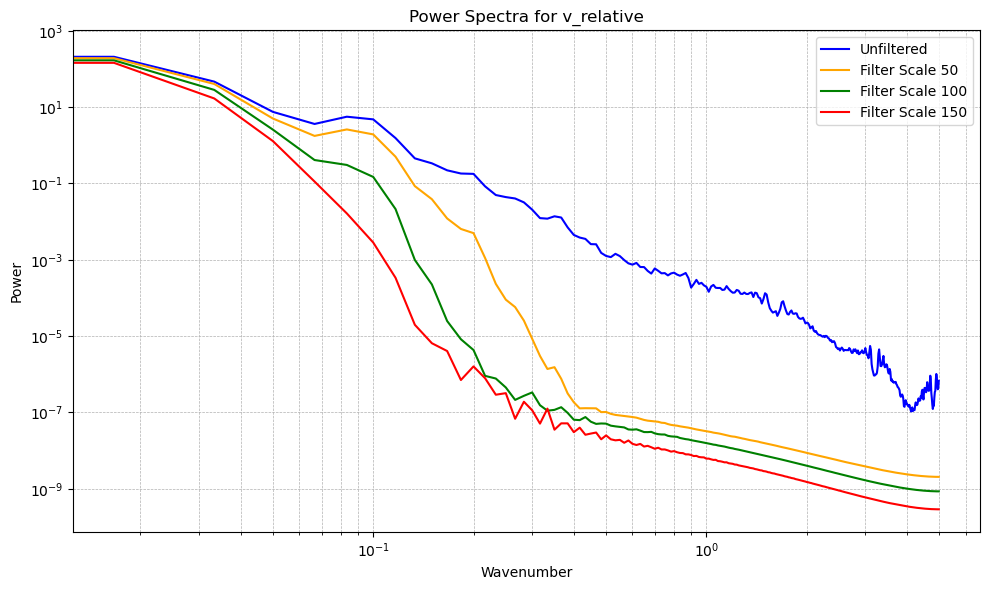

In [35]:
# Define the variable to plot
var = "v_relative"  # Replace with the name of the variable you want to plot

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Extract high-res data for the variable and compute means
high_res = ds_in[var]
ds_out_50_avg = ds_out_50[var]
ds_out_100_avg = ds_out_100[var]
ds_out_150_avg = ds_out_150[var]

# Compute power spectra
ps_orig = xrft.power_spectrum(high_res, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_50 = xrft.power_spectrum(ds_out_50_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_100 = xrft.power_spectrum(ds_out_100_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')
ps_150 = xrft.power_spectrum(ds_out_150_avg, dim=['xt_ocean'], window=True).mean('yt_ocean')

# Plot power spectra
ax.plot(ps_orig.freq_xt_ocean, ps_orig, label='Unfiltered', color='blue')
ax.plot(ps_50.freq_xt_ocean, ps_50, label='Filter Scale 50', color='orange')
ax.plot(ps_100.freq_xt_ocean, ps_100, label='Filter Scale 100', color='green')
ax.plot(ps_150.freq_xt_ocean, ps_150, label='Filter Scale 150', color='red')

# Configure plot
ax.set_title(f"Power Spectra for {var}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Power')
ax.legend(loc='best')
ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the figure
plt.tight_layout()
plt.show()


#### Practice for creating $k^{-2}$ reference slope

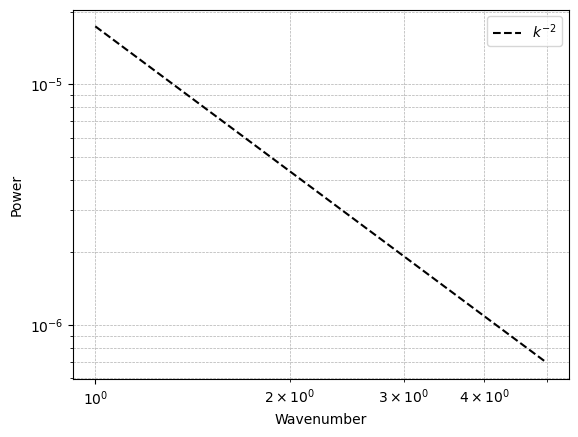

In [48]:
# Compute power spectrum
high_res = ds_in["u_ref"]
ps_orig = xrft.power_spectrum(high_res, dim='xt_ocean', window=True).mean(dim='yt_ocean')

# Convert to NumPy arrays (if needed)
freqs = ps_orig.freq_xt_ocean.values
power = ps_orig.values

# Select two wavenumbers for the k^-2 slope
k1_idx, k2_idx = -240, -1  # Indices in the frequency array
k1, k2 = freqs[k1_idx], freqs[k2_idx]

# Get power at the first wavenumber
P1 = power[k1_idx]  

# Compute the corresponding power at k2 using k^-2 scaling
P2 = P1 * (k2 / k1) ** (-2)

# Define points for the reference line
x_vals = [k1, k2]
y_vals = [P1, P2]

# Plot the k^-2 slope line
plt.plot(x_vals, y_vals, 'k--', label=r'$k^{-2}$')

# Apply log-log scaling (no need to manually log the values!)
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('Wavenumber')
plt.ylabel('Power')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()